In [100]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
import pandas as pd
from pathlib import Path
import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from geopandas.tools import sjoin
import folium
from folium.plugins import MarkerCluster
from folium import IFrame
import shapely
from shapely.geometry import Point
import unicodedata
import pysal as ps

# Import libraries and dependencies
import plotly.express as px
import seaborn as sns
import os
import hvplot.pandas
import plotly_express as px
from panel.interact import interact
from pandas.plotting import scatter_matrix
import matplotlib

In [71]:
all_texas = geopandas.read_file('../data/rawdata/tracts.json')

In [72]:
all_texas.head()

,GEOID,west,south,east,north,n,pl,p-00,pr-00,roh-00,...,pm-16,po-16,ef-16,e-16,er-16,efr-16,lf-16,imputed-16,subbed-16,geometry
0,48029110100,-98.5017,29.4142,-98.4805,29.4385,1101,"Bexar County, Texas",3319.03,37.48,1523.0,...,1.88,0.06,63.0,42.0,2.09,3.13,1.0,0.0,0.0,"(POLYGON ((-98.49591599999999 29.435767, -98.4..."
1,48029110300,-98.4895,29.4068,-98.4732,29.4222,1103,"Bexar County, Texas",2588.00,32.92,628.0,...,1.09,0.00,29.0,22.0,2.28,3.00,1.0,0.0,0.0,"(POLYGON ((-98.48687200000001 29.407662, -98.4..."
2,48029110500,-98.5152,29.4112,-98.5017,29.4228,1105,"Bexar County, Texas",2073.00,58.13,566.0,...,0.00,0.00,25.0,12.0,1.85,3.86,1.0,0.0,0.0,"(POLYGON ((-98.51382700000001 29.422633, -98.5..."
3,48029120300,-98.4819,29.4682,-98.4592,29.4962,1203,"Bexar County, Texas",7317.62,3.51,1061.0,...,2.71,0.00,9.0,8.0,0.72,0.81,1.0,0.0,0.0,"(POLYGON ((-98.460683 29.468212, -98.463627 29..."
4,48029120702,-98.4819,29.4912,-98.4591,29.5081,1207.02,"Bexar County, Texas",4261.38,5.51,1153.0,...,2.19,0.00,15.0,14.0,0.97,1.04,1.0,0.0,0.0,"(POLYGON ((-98.481872 29.491166, -98.481607999..."


In [73]:
all_texas.shape

(5259, 399)

In [74]:
all_texas.dtypes

GEOID          object
west          float64
south         float64
east          float64
north         float64
n              object
pl             object
p-00          float64
pr-00         float64
roh-00        float64
pro-00        float64
mgr-00        float64
mhi-00        float64
mpv-00        float64
rb-00         float64
pw-00         float64
paa-00        float64
ph-00         float64
pai-00        float64
pa-00         float64
pnp-00        float64
pm-00         float64
po-00         float64
ef-00         float64
e-00          float64
er-00         float64
efr-00        float64
lf-00         float64
imputed-00    float64
subbed-00     float64
               ...   
e-15          float64
er-15         float64
efr-15        float64
lf-15         float64
imputed-15    float64
subbed-15     float64
p-16          float64
pr-16         float64
roh-16        float64
pro-16        float64
mgr-16        float64
mhi-16        float64
mpv-16        float64
rb-16         float64
pw-16     

In [75]:
type(all_texas)

geopandas.geodataframe.GeoDataFrame

In [76]:
harris_county_tract_codes = geopandas.read_file('../data/rawdata/harris_co_tract_codes.csv')

In [77]:
harris_county_tract_codes.head()

,state,county,tract,tractname,block,tractcode,blockcode,geometry
0,48,201,100000,1000,1000,48201100000,482011000001000,None
1,48,201,100000,1000,1001,48201100000,482011000001001,None
2,48,201,100000,1000,1002,48201100000,482011000001002,None
3,48,201,100000,1000,1003,48201100000,482011000001003,None
4,48,201,100000,1000,1004,48201100000,482011000001004,None


In [78]:
harris_county_tract_codes.shape

(75406, 8)

In [79]:
harris_county_tract_codes.dtypes

state        object
county       object
tract        object
tractname    object
block        object
tractcode    object
blockcode    object
geometry     object
dtype: object

In [80]:
type(harris_county_tract_codes)

geopandas.geodataframe.GeoDataFrame

In [81]:
join_data = geopandas.read_file(Path('../data/cleandata/join_data.csv'))

In [82]:
type(join_data)

geopandas.geodataframe.GeoDataFrame

In [83]:
join_data.dtypes

FIPS                          object
year                          object
population                    object
poverty-rate                  object
median-household-income       object
median-property-value         object
evictions                     object
eviction-rate                 object
food_desert                   object
Pct_in_100yr                  object
Zip                           object
Rating                        object
Socioeconomic                 object
Housing - Disability          object
Minority Status - Language    object
Housing - Transportation      object
SVI INDEX                     object
geometry                      object
dtype: object

In [84]:
join_data.rename(columns = {'FIPS':'GEOID'}, inplace = True)

In [85]:
joined_data_with_geo = join_data.merge(all_texas, on='GEOID') #worked but not geopandas

In [86]:
joined_data_with_geo2 = all_texas.merge(join_data, on='GEOID')

In [87]:
joined_data_with_geo.head()

,GEOID,year,population,poverty-rate,median-household-income,median-property-value,evictions,eviction-rate,food_desert,Pct_in_100yr,...,pm-16,po-16,ef-16,e-16,er-16,efr-16,lf-16,imputed-16,subbed-16,geometry_y
0,48157670101,,,,,,,,,,...,1.06,0.00,93.0,46.0,6.93,14.01,0.0,0.0,0.0,"(POLYGON ((-95.431027 29.583509, -95.431051 29..."
1,48157670200,,,,,,,,,,...,0.00,0.00,71.0,36.0,5.37,10.60,0.0,0.0,0.0,"(POLYGON ((-95.465045 29.599599, -95.466196 29..."
2,48157670700,,,,,,,,,,...,3.83,0.46,37.0,17.0,3.84,8.35,0.0,0.0,0.0,"(POLYGON ((-95.523315 29.562431, -95.524818 29..."
3,48157672400,,,,,,,,,,...,0.74,0.00,42.0,23.0,4.06,7.41,0.0,0.0,0.0,"(POLYGON ((-95.623178 29.674298, -95.621848 29..."
4,48157672601,,,,,,,,,,...,0.17,0.00,73.0,39.0,5.86,10.98,0.0,0.0,0.0,"(POLYGON ((-95.68799 29.693546, -95.688019 29...."


In [88]:
joined_data_with_geo2 #this wont work nothing to plot on geometry column

,GEOID,west,south,east,north,n,pl,p-00,pr-00,roh-00,...,food_desert,Pct_in_100yr,Zip,Rating,Socioeconomic,Housing - Disability,Minority Status - Language,Housing - Transportation,SVI INDEX,geometry_y
0,48157670101,-95.4695,29.5812,-95.4310,29.5996,6701.01,"Fort Bend County, Texas",6162.00,15.26,398.0,...,,,77053.0,2.0,,,,,,None
1,48201100000,-95.3746,29.7449,-95.3477,29.7706,1000,"Harris County, Texas",6678.33,40.41,1091.0,...,0.0,,77392.0,3.3333333333333335,0.2757,0.0427,0.5096,0.8991,0.3868,None
2,48201210900,-95.3401,29.8001,-95.3241,29.8091,2109,"Harris County, Texas",1829.00,31.40,299.0,...,0.0,1.0,,,0.8721,0.8555,0.8058,0.2284,0.7334,None
3,48201211000,-95.3401,29.7937,-95.3240,29.8015,2110,"Harris County, Texas",2178.00,43.80,473.0,...,0.0,0.910414334,,,0.915,0.6158,0.9409,0.5767,0.8403,None
4,48201211600,-95.3159,29.7744,-95.3074,29.7875,2116,"Harris County, Texas",3302.00,23.45,379.0,...,1.0,0.0,,,0.8782,0.6835,0.946,0.5511,0.8324,None
5,48201211900,-95.3074,29.7800,-95.2917,29.7876,2119,"Harris County, Texas",6424.00,28.20,513.0,...,1.0,0.0,77020.0,5.0,0.9384,0.7396,0.9669,0.4788,0.8564,None
6,48201220200,-95.3780,29.8129,-95.3517,29.8197,2202,"Harris County, Texas",3276.48,24.84,389.0,...,1.0,0.029527559,77022.0,6.0,0.6607,0.28300000000000003,0.8859999999999999,0.2286,0.5361,None
7,48201220600,-95.3777,29.8374,-95.3568,29.8465,2206,"Harris County, Texas",3501.00,35.17,511.0,...,1.0,0.0,77022.0,8.0,0.8051,0.5248,0.9657,0.5652,0.7787,None
8,48201221100,-95.3651,29.8465,-95.3486,29.8710,2211,"Harris County, Texas",3547.00,21.52,340.0,...,2.0,0.0,,,0.9641,0.3014,0.9204,0.5122,0.7833,None
9,48201432100,-95.5212,29.7291,-95.5009,29.7375,4321,"Harris County, Texas",4112.00,14.01,1810.0,...,0.0,0.0,,,0.3514,0.0305,0.6653,0.9561,0.4843,None


In [89]:
joined_data_with_geo = geopandas.GeoDataFrame(joined_data_with_geo)

In [90]:
type(joined_data_with_geo)

geopandas.geodataframe.GeoDataFrame

In [91]:
joined_data_with_geo.rename(columns = {'geometry_y':'geometry'}, inplace=True)

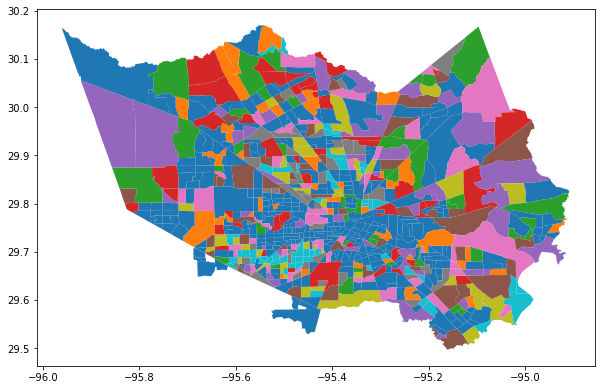

In [118]:
joined_data_with_geo.plot(column = 'Pct_in_100yr', figsize = (10,10))

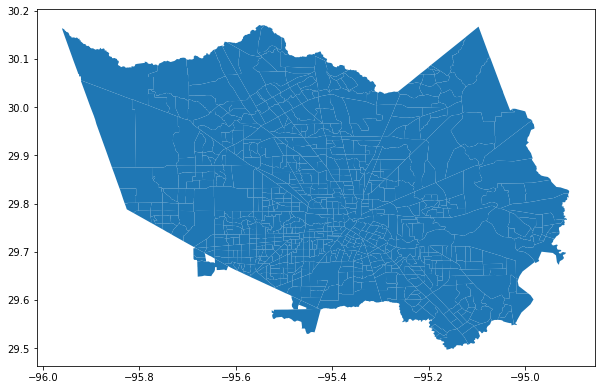

In [119]:
joined_data_with_geo.plot( figsize = (10,10))

Column
    [0] Column
        [0] Select(name='att', options=['GEOID', 'year', ...], value='GEOID')
    [1] Row
        [0] Str(AxesSubplot, name='interactive01403')

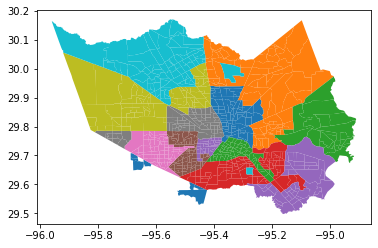

In [113]:
def geopandas_plot(att):
    return joined_data_with_geo.plot(column = attribute)

interact(geopandas_plot, attribute = joined_data_with_geo.columns)

In [105]:
joined_data_with_geo.columns

Index(['GEOID', 'year', 'population', 'poverty-rate',
       'median-household-income', 'median-property-value', 'evictions',
       'eviction-rate', 'food_desert', 'Pct_in_100yr',
       ...
       'pm-16', 'po-16', 'ef-16', 'e-16', 'er-16', 'efr-16', 'lf-16',
       'imputed-16', 'subbed-16', 'geometry'],
      dtype='object', length=416)

In [123]:
joined_data_with_geo.crs = {'init' :'epsg:4326'}

In [128]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

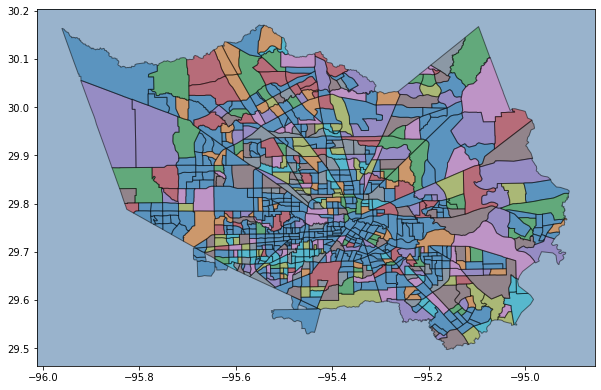

In [130]:
ax = joined_data_with_geo.plot(column = 'Pct_in_100yr', figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

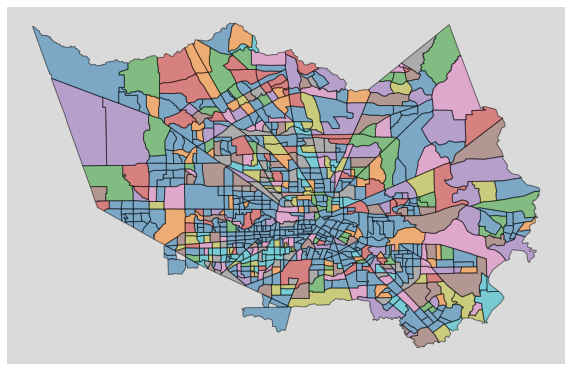

In [132]:
ax2 = joined_data_with_geo.plot(column = 'Pct_in_100yr', figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax2, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax2.set_axis_off()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

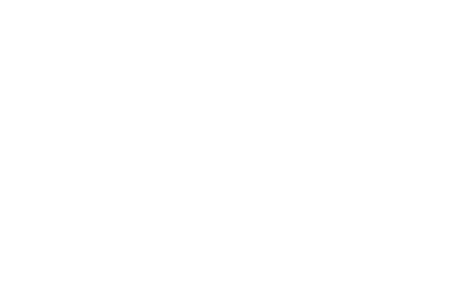

In [142]:
import geoplot

ax3 = geoplot.cartogram(
    joined_data_with_geo, scale = 'population'
)
geoplot.polyplot(joined_data_with_geo, edgecolor='gray', ax=ax3)